In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [54]:
df = pd.read_csv('train_and_test2.csv')
df = df.drop('Passengerid',axis=1)
df.head()

,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,22.0,7.2500,0,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,38.0,71.2833,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,26.0,7.9250,1,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,35.0,53.1000,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,35.0,8.0500,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [62]:
# df.uniques_value()
# dir(df)
print(df.value_counts())

Age   Fare      Sex  sibsp  zero  zero.1  zero.2  zero.3  zero.4  zero.5  zero.6  Parch  zero.7  zero.8  zero.9  zero.10  zero.11  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  zero.17  zero.18  2urvived
28.0  8.0500    0    0      0     0       0       0       0       0       0       0      0       0       0       0        0        0        0        0        3       0        0        2.0       0        0        0           19
      7.8958    0    0      0     0       0       0       0       0       0       0      0       0       0       0        0        0        0        0        3       0        0        2.0       0        0        0           18
      7.7500    0    0      0     0       0       0       0       0       0       0      0       0       0       0        0        0        0        0        3       0        0        1.0       0        0        0           18
      7.2292    0    0      0     0       0       0       0       0       0       0      0       0

In [38]:
def generate_logistic_data():
    np.random.seed(0)
    num_samples = 100
    # Class 0 and Class 1 mixed together
    class_0_samples = np.random.multivariate_normal(mean=[1, 1], cov=[[1, 0.5], [0.5, 1]], size=num_samples)
    class_1_samples = np.random.multivariate_normal(mean=[4, 4], cov=[[1, -0.5], [-0.5, 1]], size=num_samples)

    # Concatenate and shuffle the data
    data = np.concatenate((class_0_samples, class_1_samples), axis=0)
    labels = np.concatenate((np.zeros(num_samples), np.ones(num_samples)))
    shuffle_indices = np.random.permutation(data.shape[0])
    data = data[shuffle_indices]
    labels = labels[shuffle_indices]
    
    ones = np.ones((data.shape[0],))
    dic = {
        'ones':ones,
        'X1':data[:,0].reshape(-1,),
        'X2':data[:,1].reshape(-1,)
    }
    df = pd.DataFrame(dic)
    
    # Plot the mixed data
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Binary Logistic Dataset')
    plt.colorbar(label='Labels')
    plt.grid(True)
    plt.show()
    plt.close()
#     plt.scatter(data[:,1],labels,c=labels)
    
    df.iloc[:,1:] = (df.iloc[:,1:] - df.iloc[:,1:].mean()) / df.iloc[:,1:].std() 
    
    return df,labels

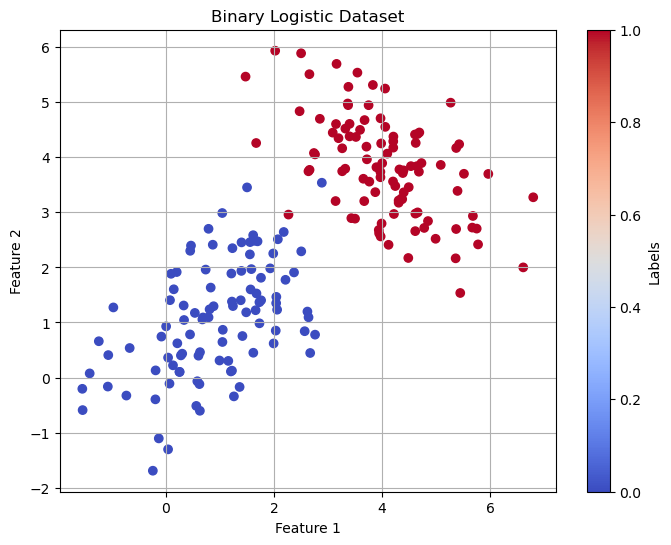

In [39]:
X,y = generate_logistic_data()
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True)
X_train,X_test = X_train.reset_index(),X_test.reset_index()
X_train,X_test = X_train.drop('index',axis=1),X_test.drop('index',axis=1)
y_train,y_test = y_train.reshape(-1,1),y_test.reshape(-1,1) 

In [40]:
X_train.head()

,ones,X1,X2
0,1.0,0.916134,1.142682
1,1.0,2.301820,0.490005
2,1.0,-0.548957,1.787453
3,1.0,-0.689615,-0.329771
4,1.0,-0.590570,-0.301641


In [5]:
def g(X):
    return 1/(1+np.exp(-X))

In [6]:
def h(X,theta):
    return X@theta

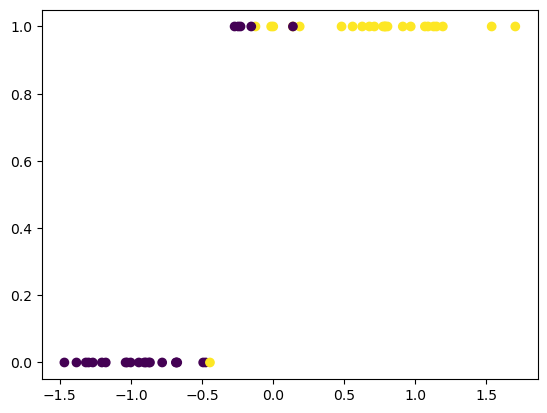

In [7]:
theta = np.random.rand(2,1)
pred = np.round(g(h(X_test,theta)))
X_test.shape,pred.shape
plt.scatter(X_test.iloc[:,1],pred,c=y_test)

In [8]:
def j(X,y,theta):

    m = len(y)
    c = 1/(2*m)
    temp1 = g(h(X,theta))
    temp2 = -np.mean(y*np.log(temp1) + (1-y)*np.log(1-temp1),axis=0)
    
    return temp2[0]

In [9]:
t = np.random.rand(2,1)
j(X_train,y_train,t)

0.5406281447162095

In [10]:
def G(X,y,theta,alpha):
    
    m = len(X)
    c = alpha/m 
    temp0 = X.transpose() #(n,m)
    temp1 = g(h(X,theta))-y #(m,1)
    temp2 = temp0@temp1 #(n,1)
    
    return theta - (c*temp2)

In [11]:
def GD(X,y,alpha,max_iter):
    
    m,n = X.shape    
    theta = np.random.rand(n,1)
    
    iter_ = 0
    costs = [j(X,y,theta)]
    cost_diff = costs[0]
    
    while iter_ <= max_iter:
        
        cur = j(X,y,theta)
        theta = G(X,y,theta,alpha)
        cost_diff = cur - j(X,y,theta)
        costs.append(cur)
        iter_ += 1
        
    plt.plot(costs)
    return theta

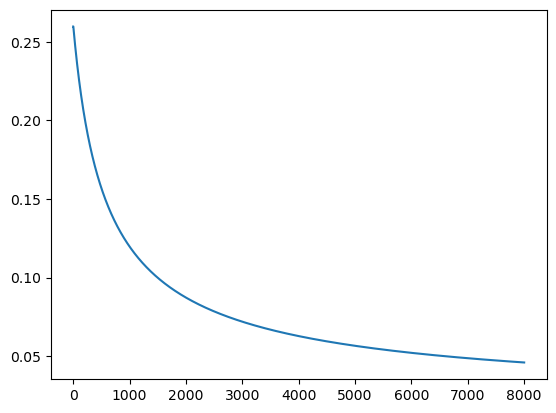

In [41]:
alpha=1e-2
max_iter = 8000

theta = GD(X_train,y_train,alpha,max_iter)

In [42]:
preds = g(h(X_test,theta))
# preds = np.array([1 if i > 0.5 else 0 for i in preds]).reshape(-1,1)
# plt.scatter(X_test.iloc[:,1],preds,c=y_test)
preds.shape

(50, 1)

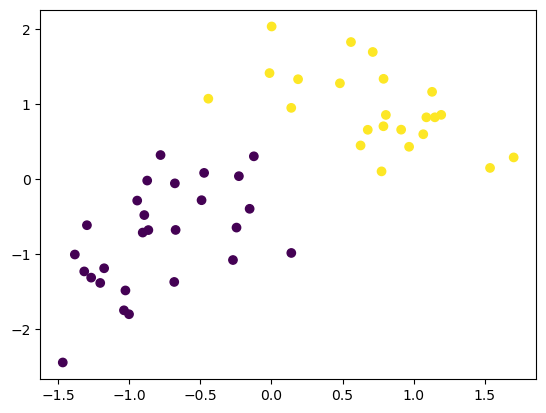

In [43]:
preds_cl = [1 if i>0.5 else 0 for i in preds[0]]
plt.scatter(X_test.iloc[:,1],X_test.iloc[:,2],c = preds_cl)

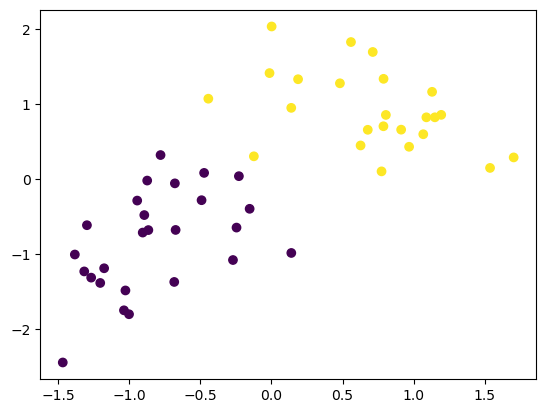

In [44]:
plt.scatter(X_test.iloc[:,1],X_test.iloc[:,2],c = y_test)

In [51]:
y_test_df = pd.DataFrame({'y':y_train.reshape(-1)})
y_test_df.head()

,y
0,1.0
1,1.0
2,1.0
3,0.0
4,0.0


E:\APPS\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


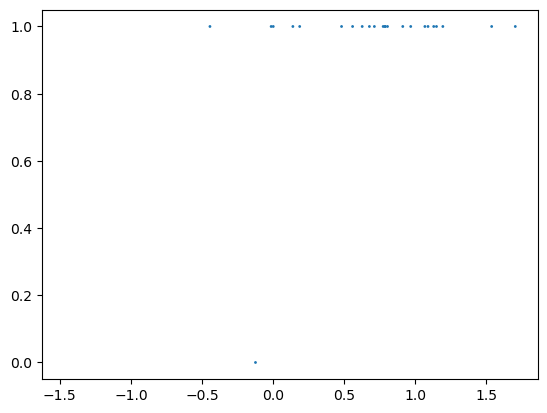

In [48]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train.drop('ones',axis=1),y_test_df)
pred_sk = clf.predict(X_test.drop('ones',axis=1))
plt.scatter(X_test.iloc[:,1],pred_sk,y_test)

In [ ]:
class Logistic_regression:
    def __init__(self,max_iter=5000,alpha=1e-3,conv=1e-3):
        self.max_iter = max_iter
        self.alpha = alpha
        self.conv = conv
        
    def h(X,theta):
        return np.dot(X,theta)
    
    def g(X):
        return 1/(1+np.exp(-X))
    
    def j(X,y,theta,alpha):
        m,n = X.shape 
        c = self.alpha/m
        preds = g(h(X,theta))
        cost = -np.mean(y*np.log(preds) + (1-y)*np.log(1-preds),axis=0)
        return cost
    
    def G(X,y,theta):
        temp1 = X.transpose() # (n,m)
        temp2 = g(h(X,theta)) - y # (m,1)
        temp2 = temp1@temp2 # (n,1)
        return temp2
    
    def GD(self,X,y)